**In the realm of Human Resources, Data Analytics plays a pivotal role in unraveling insights that can inform strategic decision-making and enhance organizational efficiency. This report encapsulates analysis conducted on HR data, delving into various facets of workforce dynamics from employee engagement ,talent acquisition and retention strategies, this analysis aims to provide a nuanced understanding of the organizational landscape.All analysis aspects were perfomed with Python.**

This dataset can also be found on :https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset

**Importing relevant libraries**

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn  as sns
import warnings
import re
warnings.filterwarnings("ignore")

**Loading  the dataset**

In [190]:
data=pd.read_csv("/kaggle/input/hr-analytics-dataset/HR_Analytics.csv")

**EXPLORATORY DATA ANALYSIS**

In [191]:
data

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [193]:
#removing  rows with missing data
data.dropna()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [194]:
#a glimpse of the top  rows
data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [195]:
#a glimpse of the bottom rows
data.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


In [196]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [197]:
average_age = data.iloc[:,1].mean()
print('Average employee age:', average_age)



Average employee age: 36.917567567567566


In [198]:
average_daily_rate=data['DailyRate'].mean()
print('Average employee daily rate :', average_daily_rate)


Average employee daily rate : 801.3844594594594


**DATA VISUALISATION**

Text(0.5, 1.0, 'Employee ID count by Attrition')

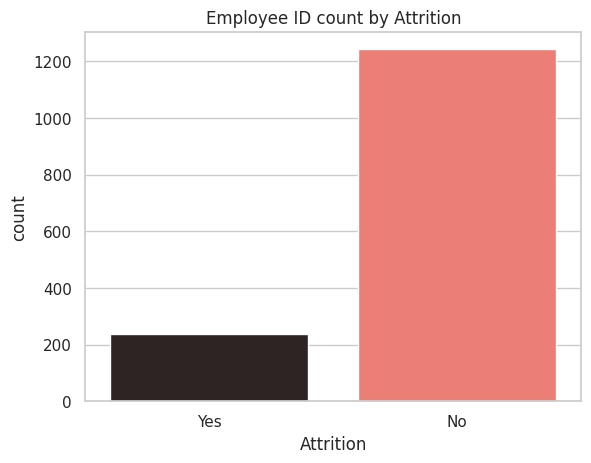

In [199]:
sns.set(style="whitegrid")
sns.countplot(data=data, x='Attrition', palette='dark:#FF6F61')
plt.title('Employee ID count by Attrition')


Text(0.5, 1.0, 'Employee ID count by Attrition  by BusinessTravel')

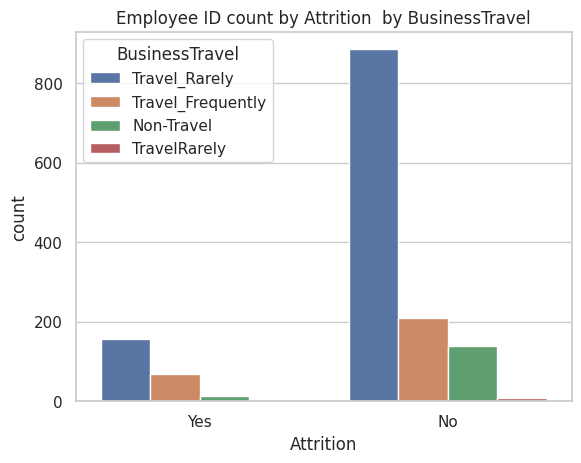

In [200]:
sns.set(style="whitegrid")
sns.countplot(data=data, x='Attrition',hue='BusinessTravel' , palette='deep' )
plt.title('Employee ID count by Attrition  by BusinessTravel')

In [201]:
#distribution of employees by age group
ag = 'AgeGroup'
item_counts = data[ag].value_counts()
print(item_counts)


AgeGroup
26-35    611
36-45    471
46-55    228
18-25    123
55+       47
Name: count, dtype: int64


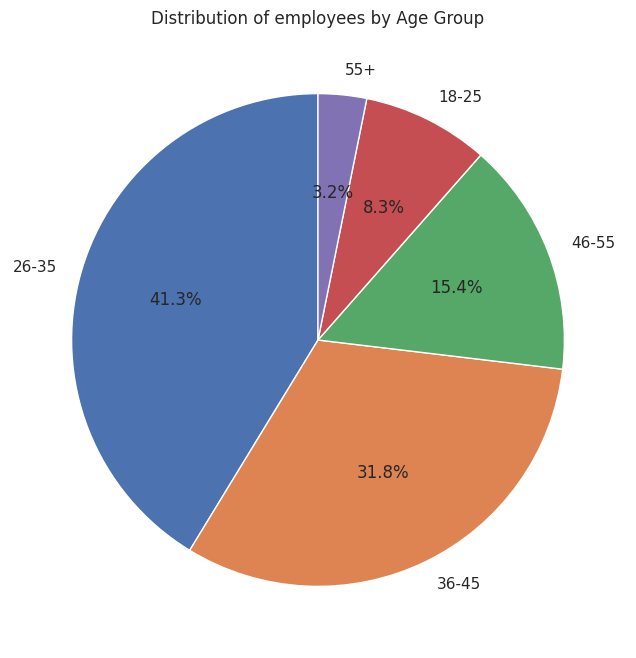

In [202]:
#pie-chart plot
plt.figure(figsize=(8, 8))
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of employees by Age Group')
plt.show()

In [203]:
#distribution of employees by BusinessTravel
bt = 'BusinessTravel'
item_counts = data[bt].value_counts()
print(item_counts)

BusinessTravel
Travel_Rarely        1042
Travel_Frequently     279
Non-Travel            151
TravelRarely            8
Name: count, dtype: int64


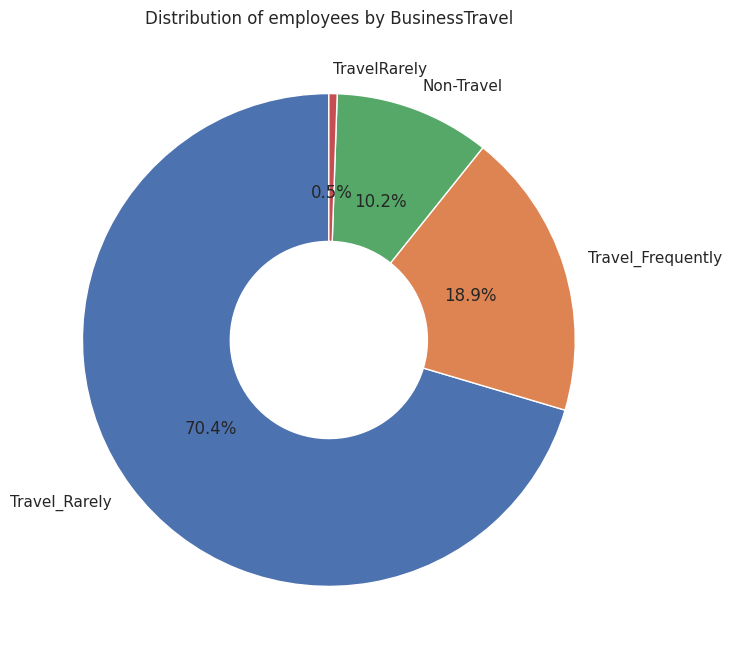

In [204]:
#doughnut chart plot
plt.figure(figsize=(8, 8))
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))
centre_circle = plt.Circle((0, 0), 0.2, color='white', edgecolor='k', linewidth=0.8)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of employees by BusinessTravel')
plt.show()

In [205]:
#sum of daily rate by age distribution
age_col = 'Age'
dr_col = 'DailyRate'

sum_values = data.groupby(age_col)[dr_col].sum()


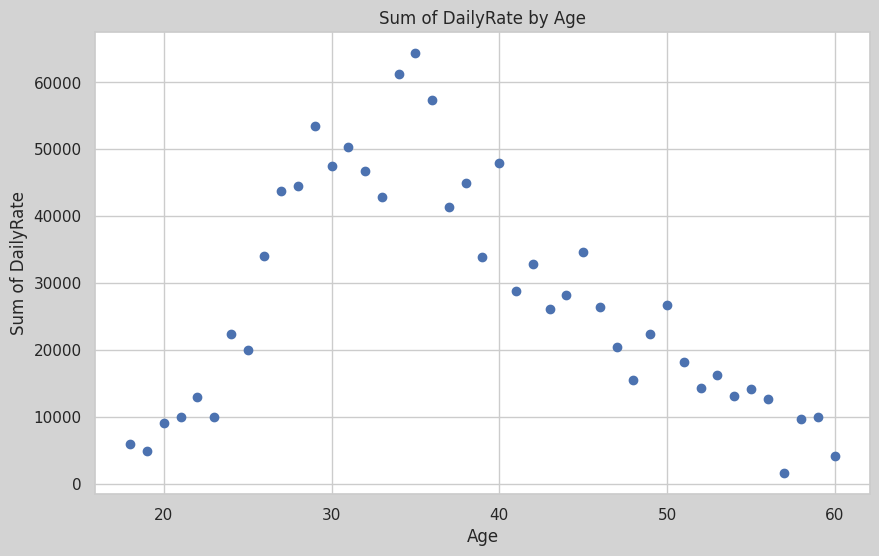

In [206]:
#scatter plot
plt.figure(figsize=(10, 6),facecolor='lightgrey')
plt.scatter(sum_values.index, sum_values.values, marker='o')
plt.title(f'Sum of DailyRate by {age_col}')
plt.xlabel('Age')
plt.ylabel(f'Sum of {dr_col}')
plt.grid(True)
plt.show()

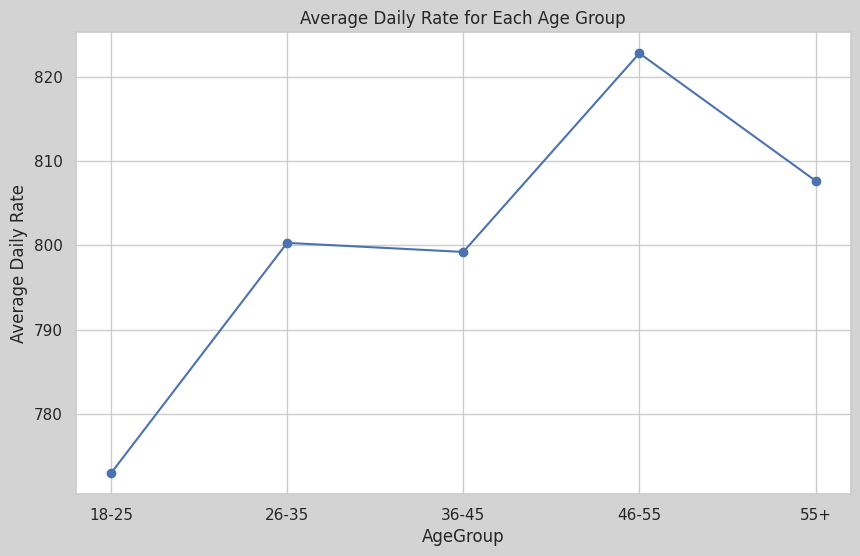

In [207]:
#average daily rate for each age group
ag = 'AgeGroup'
dr_col="DailyRate"

average_daily_rate = data.groupby(ag)[dr_col].mean().reset_index()

In [ ]:
#line chart
plt.figure(figsize=(10, 6),facecolor='lightgrey')
plt.plot(average_daily_rate[ag], average_daily_rate[dr_col], marker='o', linestyle='-')
plt.title('Average Daily Rate for Each Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Average Daily Rate')
plt.grid(True)
plt.show()

In [208]:
#the average daily rate for each age group
Departm = 'Department'
dr_col= 'DailyRate'

average_daily_rate = data.groupby(Departm)[dr_col].mean().reset_index()


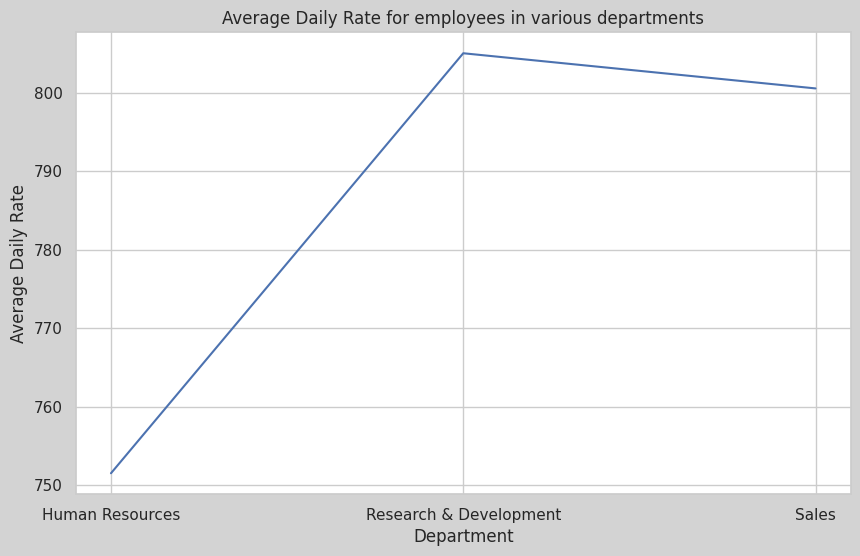

In [213]:
# Line chart plot
plt.figure(figsize=(10, 6),facecolor='lightgrey')
plt.plot(average_daily_rate[Departm], average_daily_rate[dr_col], marker='none', linestyle='-')
plt.title('Average Daily Rate for employees in various departments')
plt.xlabel('Department')
plt.ylabel('Average Daily Rate')
plt.grid(True)
plt.show()

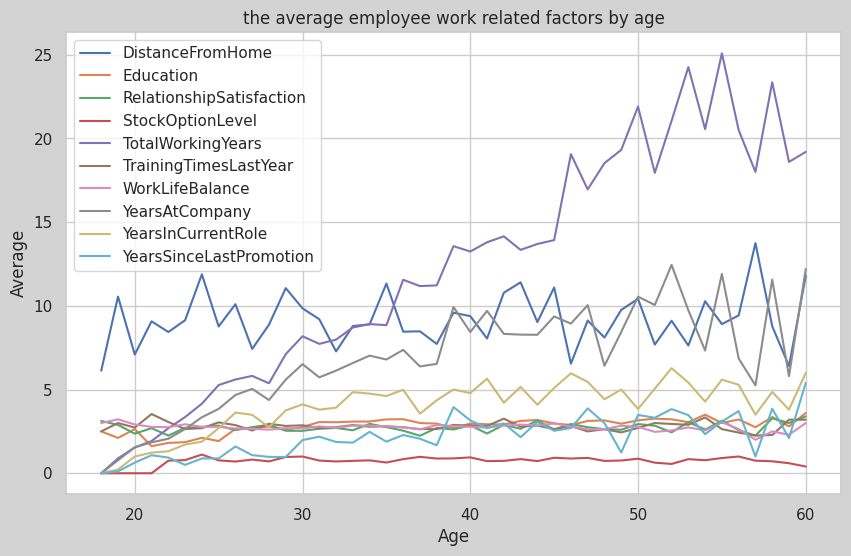

In [210]:
# the average employee work related factors by age 
age_col = 'Age'
work_related_factors= ['DistanceFromHome','Education','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']
average_daily_rates = data.groupby(age_col)[employee_stats].mean().reset_index()

# for multiple data lines on the same axis
plt.figure(figsize=(10, 6),facecolor='lightgrey')

for column in daily_rate_columns:
    plt.plot(average_daily_rates[age_col], average_daily_rates[column], marker='none', label=column)

plt.title('the average employee work related factors by age')
plt.xlabel('Age')
plt.ylabel('Average')
plt.legend() 
plt.grid(True)
plt.show()

In [211]:
#Education Field Distribution 
ef = 'EducationField'
item_counts = data[ef].value_counts()
print(item_counts)

EducationField
Life Sciences       607
Medical             470
Marketing           161
Technical Degree    132
Other                83
Human Resources      27
Name: count, dtype: int64


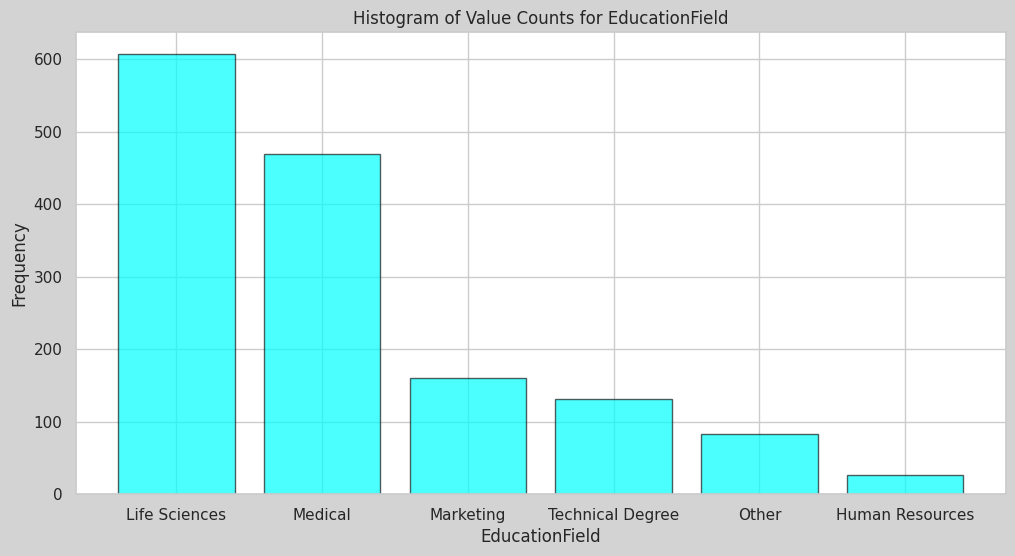

In [212]:
#barplot of Education Field value counts
plt.figure(figsize=(12, 6),facecolor='lightgrey')
plt.bar(item_counts.index, item_counts.values, color='cyan', edgecolor='k', alpha=0.7)
plt.xlabel(ef)
plt.ylabel('Frequency')
plt.title('Histogram of Value Counts for {}'.format(ef))
plt.show()

**Thank you!**